In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


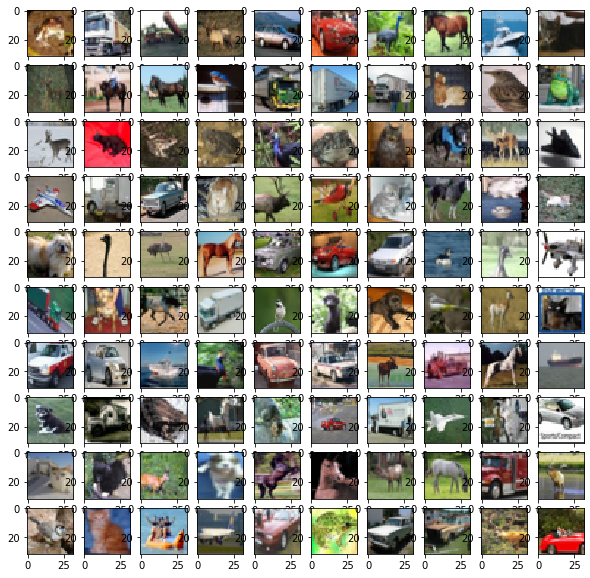

In [6]:
fig=plt.figure(figsize=(10,10))
for i in range(100) :
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i])
plt.show()

In [7]:
x_train=images_train.reshape(50000,3072)
x_test=images_test.reshape(10000,3072)

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [9]:
pca=PCA()
pca.fit_transform(x_train)
total=sum(pca.explained_variance_)
curr,k=0,0
while curr/total < 0.95 :
    curr+=pca.explained_variance_[k]
    k+=1
print(k)

217


In [10]:
pca=PCA(n_components=217,whiten=True)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [ ]:
clf=SVC()
grid={'C':[1e2,1e4,1e1,5e3,1e3,5e2],'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}
abc=GridSearchCV(clf,grid, n_jobs=-1)
abc.fit(x_train_pca,cls_train)
y_pred=abc.predict(x_test_pca)
print(abc.score(x_test_pca,cls_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
import numpy as np
dt=np.dtype('U25')
output=np.empty((10000),dtype=dt) 
for i in range(len(y_pred)):
    output[i]=class_names[y_pred[i]]

In [ ]:
np.savetxt("to by submitted CIFAR_10.csv", output,fmt='%s')